In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_wine

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier(n_estimators=100)

# 5 splits differents donnent 5 scores differents !
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Seed {seed}: accuracy = {score:.4f}")

Seed 0: accuracy = 1.0000
Seed 1: accuracy = 0.9667
Seed 2: accuracy = 0.9667
Seed 3: accuracy = 1.0000
Seed 4: accuracy = 0.9667
Seed 5: accuracy = 0.9000
Seed 6: accuracy = 0.9333
Seed 7: accuracy = 0.8667
Seed 8: accuracy = 0.9000
Seed 9: accuracy = 1.0000


In [5]:
import numpy as np

X, y = load_wine(return_X_y=True)
print(f"Dataset : {X.shape}")
print(f"classes : {np.unique(y)} : distribution : {np.bincount(y)}")

Dataset : (178, 13)
classes : [0 1 2] : distribution : [59 71 48]


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold , cross_val_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_kf = cross_val_score(model, X, y, cv=kf, scoring="accuracy")
scores_skf = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

print(f"Kfold : Accuracy CV: {scores_kf.mean()} (+/- {scores_kf.std()})")
print(f"scores : {scores_kf}")
print(f"Stratified : Accuracy CV: {scores_skf.mean()} (+/- {scores_skf.std()})")
print(f"scores : {scores_skf}")

Kfold : Accuracy CV: 0.9831746031746033 (+/- 0.02230370548603213)
scores : [1.         1.         0.94444444 0.97142857 1.        ]
Stratified : Accuracy CV: 0.9774603174603176 (+/- 0.021299434518521104)
scores : [0.97222222 1.         0.97222222 0.94285714 1.        ]


## RepeatStratifiedKflods

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

scores_rkf = cross_val_score(model, X,y, cv=rkf, scoring="accuracy")
print(f"Repeated CV: {scores_rkf.mean():.4f} (+/- {scores_rkf.std()})")
print(f"Nb iterations: {len(scores_rkf)}")

Repeated CV: 0.9780 (+/- 0.024696923283119822)
Nb iterations: 50


## LOO

In [9]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

# N iterations (une par echantillon)
scores = cross_val_score(
    model, X, y, cv=loo
)
print(f"LOO Accuracy: {scores.mean():.4f} (+/- {scores.std()})")
print(f"Nb iterations: {len(scores)}")

LOO Accuracy: 0.9831 (+/- 0.12872403637516402)
Nb iterations: 178


## cross_validate Vs cross_val_score

In [11]:
from sklearn.model_selection import cross_validate

results = cross_validate(
    model, X, y, cv=rkf,
    scoring=["accuracy", "f1_macro", "precision_macro", "recall_macro"],
    return_train_score=True
)

print(f"Test accuracy : {results['test_accuracy'].mean():.4f} (+/- {results['test_accuracy'].std():.4f})")
print(f"Test F1 : {results['test_f1_macro'].mean():.4f} (+/- {results['test_f1_macro'].std():.4f})")
print(f"Test précision : {results['test_precision_macro'].mean():.4f} (+/- {results['test_precision_macro'].std():.4f})")
print(f"Test recall : {results['test_recall_macro'].mean():.4f} (+/- {results['test_recall_macro'].std():.4f})")
print(f"Train accuracy : {results['train_accuracy'].mean():.4f} (+/- {results['train_accuracy'].std():.4f})")
print(f"Time : {results['fit_time'].mean():.4f}")

Test accuracy : 0.9780 (+/- 0.0247)
Test F1 : 0.9786 (+/- 0.0240)
Test précision : 0.9786 (+/- 0.0226)
Test recall : 0.9809 (+/- 0.0225)
Train accuracy : 1.0000 (+/- 0.0000)
Time : 0.0708


## Comparer plusieurs modèles

In [16]:
from sklearn.linear_model import LogisticRegression

models = {
    "LogisticRegression": LogisticRegression(max_iter=200, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
}

all_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    all_scores[name] = scores
    print(f"{name} : {scores.mean():.4f} (+/- {scores.std():.4f})")

c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:

LogisticRegression : 0.9498 (+/- 0.0368)
RandomForest : 0.9775 (+/- 0.0213)


## Graphique de comparaison

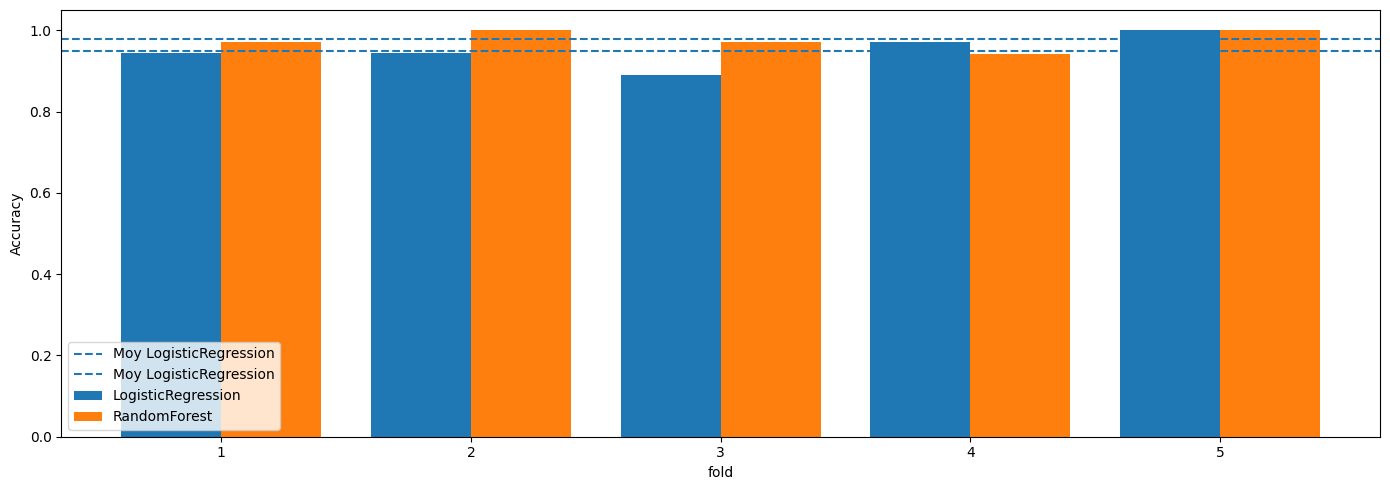

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,1, figsize=(14,5))

folds = np.arange(1, 6)
width = 0.40

axes.bar(folds - width/2, all_scores["LogisticRegression"], width, label="LogisticRegression")
axes.bar(folds + width/2, all_scores["RandomForest"], width, label="RandomForest")
axes.axhline(y=all_scores["LogisticRegression"].mean(), linestyle="--", label='Moy LogisticRegression')
axes.axhline(y=all_scores["RandomForest"].mean(), linestyle="--", label='Moy LogisticRegression')
axes.set_xlabel('fold')
axes.set_ylabel('Accuracy')
axes.legend()

plt.tight_layout()
plt.show()